# Principle component analysis and the covariance matrix
## A short visual guide on how they are linked
You probably have an idea of what variance is but did you ever realize that the variance and covariance have a geometric interpretation? Many algorithms such as logistic regression (LR), support vector machines (SVM), and neural networks (NN) greatly benefit from zero-mean, standardized, and uncorrelated features. This can be achieved using the covariance matrix and principle component analysis and this article aims to explain this in a visual manner.
![Image showing many fish in the ocean.](Assets/header.jpeg)

Before we start with the covariance let us first have a quick look at the mean and variance. These are two statistics we are generally interested in when talking about a dataset or population. For example, we might be interested in the mean length of a fish in the ocean. To get the exact value we need to measure each fish in the ocean, which is of course completely impossible to do.

To make good estimates in uncertainty we use statistics. Instead of measuring all the fish in the ocean, we take a sample and say that this sample represents the length of all fish in the ocean. This sample could be for example 1000 fish we randomly caught all over the ocean. From these 1000 fish the average length is 10cm. This gives a first impression on the length of the fish, but this does not tell you much on what you can expect. To get a better impression on what to expect we also measure the spread of a distribution. For example, we have two distribution of three fish, the first being [0.1cm, 10cm, 20cm]  and the second [9cm, 10cm, 11cm]. Both distributions have (almost) identical mean, namely 10cm. Still, the distributions are completely different as in the first you can expect fish between 0.1cm and 20cm while in the second between 9cm and 11cm. The second distribution as a much smaller spread. The spread is generally measured using variance or standard deviation (square root of the variance). The variance is literally the average difference between the mean of the distribution and is defined as:

\begin{equation}
\sigma^2(X) = \frac{1}{n - 1} \sum^n_{i=1} \left( x_i - \bar x \right)^2
\end{equation}

Here, X is our distribution and we sum over all squared differences between the sample and the distribution mean (x̅). In this article I promised to discuss the covariance which is closely related to the variance. The covariance is a measure of how much two random variables vary together. This might be a bit vague, but let us express this in terms of our fish example. Instead of only measuring the the length of each fish, we also measured the weight. Now we can use the covariance to compare how much these to variables vary together. Before we show an example using Python, lets have a look at the definit

\begin{equation}
\sigma(X, Y) = \frac{1}{n - 1} \sum^n_{i=1} \left( x_i - \bar x \right) \left(y_i - \bar y \right)
\end{equation}

You might notice that the equation for variance is almost identical to the equation for covariance. Specifically, the variance is the covariance with itself. Another property we can see in this equation is that it is symmetrical, i.e. the order of X and Y do not matter and give identical results. But what does the number that comes out of the covariance calculation actually mean? For this, let us create a dataset about our fish's length and weights and translate these equations into 🐍 Python!

In [106]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 1000
n_features = 2
mu = 10
sigma = 2.5

np.random.seed(42)
X = np.random.normal(mu, sigma, size=(n_samples, n_features))

The code above creates two normally distributed sets of numbers which we group in a single Numpy array. The mean of both distributions are 10 and we set the standard deviation at 2.5. For both properties (X = length, Y = weight), we take 1000 samples. When we plot the distribution, it looks like this:

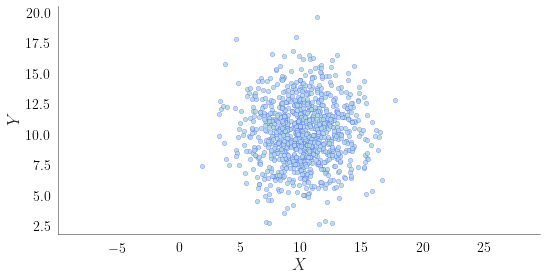

In [119]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(7.7, 4), tight_layout=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.patch.set_facecolor('white')
ax.scatter(X[:, 0], X[:, 1], alpha=0.85, color='lightblue', edgecolors='blue', s=20, linewidth=0.2)
ax.axis('equal');
_, _ = ax.set_xlabel('$X$', fontsize=17), ax.set_ylabel('$Y$', fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
dark_grey = '#262626'
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(dark_grey)
ax.xaxis.label.set_color(dark_grey)
ax.yaxis.label.set_color(dark_grey)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

Feature X (length) is on the horizontal axis and feature Y (weight) is on the vertical axis. Next, we will write a function to calculate the variance and the covariance. As the variance is identical to the covariance with itself, we only need to implement that function.

In [2]:
def covariance(X, Y):
    """
    Calculate the covariance between two random variables.
    """
    xbar = np.mean(X)
    ybar = np.mean(Y)
    covar = 1 / (len(X) - 1) * np.sum( (X - xbar) * (Y - ybar) )
    return covar

(x, y) = X.T  # split into two features

print(f"Variance for x   : {covariance(x, x)}")
print(f"Covariance of x,y: {covariance(x, y)}")

Variance for x   : 5.779256243644815
Covariance of x,y: 0.01576313225761504


The distribution we created had a standard deviation of 2.5, this means that we expect a variance of 6.25 ((2.5)²). Our covariance with itself, which is the variance, we find 5.77 which is quite close but not perfect. We have a subset of the population of fish and therefore, not all the fish in the ocean. A small mismatch is to be expected. When we look at the covariance between the two variables we have, length and weight, we see that it is quite small (0.016). We took random samples from a normal distribution and this means that both variables are independent, i.e. uncorrelated. We expect that the covariance is zero. For the same reasoning as before, we have a small but explainable mismatch. Both, variance and covariance are very useful when investigating a dataset. We can calculate the variance and covariance of all our features separately or we can do it all at once and calculate the so-called variance-covariance matrix, or simply called the covariance matrix. When calculating the covariance matrix, you will get square matrix where both dimensions are the amount of features in a dataset. If we would calculate the covariance matrix for our fish dataset, it would have a dimensions 2x2. Each position in the matrix is a covariance between two of the features. On the diagonal are all the variances and on all the off-diagonal are the covariances. As mentioned before, the covariance is a symmetric function. This results that the covariance-matrix is also symmetric and both sides of the diagonal are identical. The covariance matrix can be calculated in Python like this:

In [108]:
def covariance_matrix(matrix):
    """
    Calculate the variance-covariance matrix.
    """
    n_feat = len(matrix.T)
    C = np.zeros([n_feat, n_feat])
    for ix_1, feature_1 in enumerate(matrix.T):
        for ix_2, feature_2 in enumerate(matrix.T):
            C[ix_1, ix_2] = covariance(feature_1, feature_2)
    return C

C = covariance_matrix(X)
C

array([[5.77925624, 0.01576313],
       [0.01576313, 6.43838968]])

Of course all popular libraries have the covariance matrix build in:

In [4]:
np.cov(X.T)

array([[5.77925624, 0.01576313],
       [0.01576313, 6.43838968]])

Indeed, the covariance matrix is of size 2x2 and we see that the variances are on the diagonal. Both distributions have a different spread, however, the covariance is identical in both entries  as it should (the covariance is symmetric). Now, that we have made the covariance clear, lets move to a better example. When looking at our previous distribution, the relation between length and weight of the fish did not feel right. Our gut-feeling probably tells us that the weight should increase with the length of the fish, at least in some extent. Have a look at the new distribution:

In [110]:
# Scale x and y distribution
sx, sy = 0.8, 4
Scale = np.array([
    [ sx, 0 ], 
    [ 0,  sy],
])

# Rotate data
theta = 0.35 * np.pi
Rot = np.array([
    [ np.cos(theta), -np.sin(theta)], 
    [ np.sin(theta),  np.cos(theta)],
])

T = Scale.dot(Rot)

# Transform data
X2 = X.dot(T)
X2[:,1] += 4

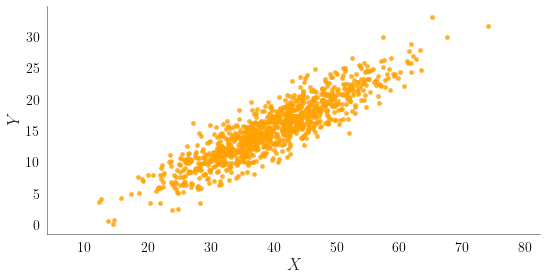

In [118]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(7.7, 4), tight_layout=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.patch.set_facecolor('white')
ax.scatter(X2[:, 0], X2[:, 1], alpha=0.85, color='orange', edgecolors='darkorange', s=20, linewidth=0.2)
ax.axis('equal');
_, _ = ax.set_xlabel('$X$', fontsize=17), ax.set_ylabel('$Y$', fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
dark_grey = '#262626'
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(dark_grey)
ax.xaxis.label.set_color(dark_grey)
ax.yaxis.label.set_color(dark_grey)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

It is now clearly visible that  these two variables share a trend. When a fish is smaller in length, it is generally also lighter, while longer fish are often on the heavy side. Due to the transformations, the averages have changed to 39.8cm and 15.2kg for the length and weigh respectively. Lets have a look at the covariance matrix:

In [8]:
covariance_matrix(X2)

array([[82.58538422, 40.14431898],
       [40.14431898, 24.12757468]])

The variances are much larger now. The spread on the length of the fish (X) is approximately 4 times larger than the spread on the weight. A quick check in figure 2 shows that this is indeed the case (the width of values on both axes show a difference of approximately a factor four). Notice that the variance explains the spread only in the direction parallel to the axes, i.e. in the horizontal and vertical directions of figure 2.

In our previous example, we had uncorrelated data, and this resulted in a covariance close to zero. In this example, the covariance is much larger and as we already suspected from the figure, the features show a correlation. Another thing to notice is that the covariance is positive, meaning that the features are positively correlated. Larger fish are heavier and  smaller fish are lighter. When size increases, so does the weight. If the value of the covariance would have been negative, the features would have been negatively correlated, i.e. if one feature increases, the other feature would decrease and vice versa. For uncorrelated features, where the covariance is (close to) zero, if one feature changes, the other feature would not respond to that change. To get some more feeling on these numbers, have a look on the table below:
![Table calculating covariance step by step](Assets/table.png)

The table shows our previously defined variables X (the length of the fish) and Y (the weight of the fish). For simplicity, we only have gathered five samples. X has values 35cm, 30cm, 12cm, 25cm, and 22cm and for the same fish, we measured weights of 9kg, 7kg, 3kg, 5kg, and 4kg respectively. The first step is to calculate the mean of both variables. For X and Y the means are 24.8cm and 5.6cm. Next, we are going to calculate the difference between the sample and its mean for each variable (shown as x-<x> in the table). A positive value means that the sample is larger than its average value and a negative value is below the typical value. We are now just two steps away from the covariance. First we need to multiply deviation from means with each other. Notice that when two signs are identical, i.e. both are positive or negative, the product will also be positive. When one of the two values are of a different sign, we get negative values. In this example, most samples have the same sign (shown in green). To get the covariance, we need sum the final values and divide them by n-1. Again, we have a positive covariance and therefore, the variable X and Y are positively correlated.

Now, lets ask ourselves, how do we get a covariance of zero? There are two possible options. The first option is that if one sample is large (we have a large fish), the other variable is approximately the mean. We would multiply a large number (the large fish) with approximately zero (the average weight). This would have been visible when we plotted the distribution as it would resemble a cross figure (think about it or check figure 3). The second option for a covariance to be close to zero is that the average tends to zero. They are on average a similar amount of positively correlated samples (the positive product values) as there are negatively correlated samples (when the product is negative). We cannot predict one variable using the other and therefore, they are not correlated. This is what we see in our first, completely random distribution.

> The covariance is zero when the positive correlation contributions are equal to the negative correlation contributions, resulting in unpredictable behavior.

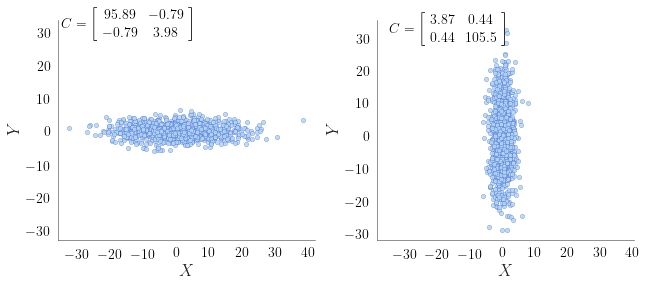

In [117]:
from matplotlib import rcParams
rcParams['text.latex.preamble'] = ''
rcParams['text.usetex'] = True

n_samples = 1000
mu = 0
sigma1 = 10
sigma2 = 2

np.random.seed(42)
Z1 = np.hstack([
        np.random.normal(mu, sigma1, size=(n_samples, 1)),
        np.random.normal(mu, sigma2, size=(n_samples, 1)),
])
Z2 = np.hstack([
        np.random.normal(mu, sigma2, size=(n_samples, 1)),
        np.random.normal(mu, sigma1, size=(n_samples, 1)),
])

# Plotting
def rstr(a):
    return str(round(a * 100)/100)

fig, axes = plt.subplots(1, 2, figsize=(9, 4), tight_layout=True)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
fig.patch.set_facecolor('white')
for ax, P in zip(axes, [Z1, Z2]):
    ax.scatter(P[:, 0], P[:, 1], alpha=0.85, color='lightblue', edgecolors='blue', s=20, linewidth=0.2)


    ax.axis('equal');
    _, _ = ax.set_xlabel('$X$', fontsize=17), ax.set_ylabel('$Y$', fontsize=17)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    dark_grey = '#262626'
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_linewidth(0.5)
        ax.spines[spine].set_color(dark_grey)
    ax.xaxis.label.set_color(dark_grey)
    ax.yaxis.label.set_color(dark_grey)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    (a, b, c, d) = covariance_matrix(P).flatten()
    mtrx = r"$ C = \left[ \begin{array}{cc} "+rstr(a)+ r" & "+rstr(b)+ r" \\ "+rstr(c)+ r" & "+rstr(d)+ r" \end{array} \right] $"
    ax.annotate(mtrx, (-35, 29), size=14)

Now we know that a large positive covariance means a positive correlation and a large negative covariance means a negative correlation. But what does the magnitude of the covariance actually mean. It is related to the amount of correlation between the two variables, i.e. larger is more correlated. But what if we would have a third variable, e.g. maximum swim velocity, and want to know which of the variables are more correlated with each other? The problem here is that the covariance still has units, namely cm*kg. Of course, these units do not make sense in the real world and the measure is only good for comparing with other covariances with identical units. To compare multiple covariances with each other, we need to normalize them. This is what is done when we calculate the correlation (Pearson Population Coefficient):

\begin{equation}
\text{Corr}(X,Y) = \frac{\sigma(X, Y)}{\sigma^2(X) \sigma^2(Y)}
\end{equation}

The correlation is the covariance (numerator) divided by the individual variance of each variable (denominator). What is great about this normalization is that the correlation scales between -1 and 1. When -1, both variables are perfect negatively correlated and when 1, they are positively correlated. There are no more units as they are divided out, and therefore, we can now compare the amount of correlation with any variable we want.

## The geometric interpretation
I promised a geometric interpretation of the covariance matrix and maybe from the previous examples you have already a hunch where we are going. In our fish example, when calculating the covariance matrix, there are three unique values. Two of these values are the variances of each feature and they indicate the spread. The wider the spread, the larger the variance. We can imagine these variances as vectors (more spread is a larger vector). The final number in the covariance-matrix is the covariance itself and this tells us how correlated the two features are. This can be seen as the angle between the two vectors. If the angle is perpendicular, the features are not correlated. All three cases are shown in figure 4:
![Geometric interpretation of covariance](Assets/geometric1.png)

The angle between the two vectors (the covariance) is directly related to the overlap of the two vectors. If we would project vector Y on top of vector X, i.e. calculate how much vector Y is overlapping with vector X, we can calculate the angle using the so called dot product:
![Link between dot product and covariance](Assets/geometric2.png)

What we have learned so far is that the covariance is the rotation between two vectors. The rotation is in direct relation with the dot product that is a measure of overlap between two vectors. Rewriting the dot product we seen an equation that must look very familiar:
![Projects dot product similar to Pearsons r](Assets/geometric3.png)

By reordering the dot product equation we can set the cosine(⍬) in front. If the vectors are not overlapping (no correlation), cosine(⍬) is zero. The more there is a positive correlation, cosine(⍬) increases in the positive direction, with a maximum of 1 for perfect overlap. The negative correlation, cosine(⍬) in the negative direction, with -1 as the perfect anti-correlation.

All this this information is encoded in the covariance matrix. The variances indicate the scale of each vector (feature) and the covariance indicates the amount of rotation (overlap) between the two vectors.

## Principle component analysis and whitening
The geometric relation is exploited in Principle Component Analysis (PCA) and other related techniques. In our fish measuring example, there is a clear correlation and we can draw an imaginary diagonal that fits that trend. If we would calculate the variance (spread) on this diagonal line, it would be larger than the other two variances. PCA finds these optimal axes, generally called basis, and orders these using the variance. The first basis will have the largest variance and the second will be a bit less. Generally, PCA is used as a method for dimension reduction, i.e. reduce features while minimizing the loss of important information. The principle components can also be used for a technique called whitening, which decorrelates the input vector and transforms it into a white noise vector. This can be useful for many Machine Learning (ML) techniques such as logistic regression, support vector machines, and artificial neural networks. These algorithms perform much better if the features are uncorrelated and whitening can help. To find the principle components for our example data we have to  calculate the eigen vectors and eigen values of the covariance matrix. While we could easily spend hours on the topic of eigen values and eigen vectors, for now, it is important to know that the vectors define the direction en the values define their scaling. For this particular case (because our covariance matrix is symmetric), the eigen vectors are perpendicular to each other and this makes it pretty neat. Calculating the eigen vectors is not that trivial but Numpy has all of the linear algebra included:

In [115]:
C = covariance_matrix(X2)

eigen_values, eigen_vectors = np.linalg.eig(C)
mu1, mu2 = np.mean(X2, axis=0)

Now we can use the eigen values and eigen vectors to overlay the principle components:

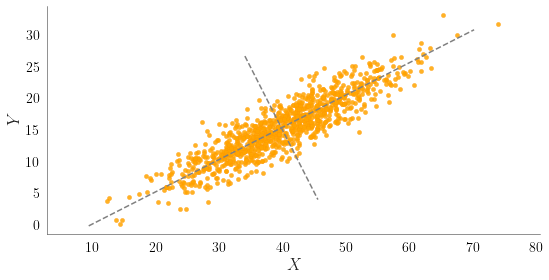

In [116]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(7.7, 4), tight_layout=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.patch.set_facecolor('white')
ax.scatter(X2[:, 0], X2[:, 1], alpha=0.85, color='orange', edgecolors='darkorange', s=20, linewidth=0.2)
ax.axis('equal');
_, _ = ax.set_xlabel('$X$', fontsize=17), ax.set_ylabel('$Y$', fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
dark_grey = '#262626'
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(dark_grey)
ax.xaxis.label.set_color(dark_grey)
ax.yaxis.label.set_color(dark_grey)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')


# The eigen vectors are the columns of the eigen_vectors
for (vx, vy), ev in zip(eigen_vectors.T, eigen_values):
    ev = 3 * np.sqrt(ev)
    plt.plot(
        mu1 + np.array([-ev, ev]) ,
        mu2 + np.array([-ev, ev]) * vy/vx,
        '--',
        color='gray',
    )

If we would do PCA we could for example only take the main principle component, which is the diagonal and look at its influence on the target variable. However, if we want to apply whitening, we want to somehow rotate the data such that the first principle component is horizontal and the second is vertical. Of course, this is all also possible with 100 dimensions, but impossible to visualize. We could choose to standardize the variance but that depends on what we want to achieve. For now, lets just remove the correlation between the two features.  In Python, it is only a few lines:

In [121]:
X3 = X2.copy()
mus = np.mean(X3, axis=0)
X3 = (X3 - mus).dot(eigen_vectors) + mus

# Standardized:
# X3 = (X3 - mus).dot(eigen_vectors) / np.sqrt(eigen_values)

We do a dot product with the eigen vectors, which will apply the rotation. To standardize, we would also divide by the square root of the eigen values to scale to unit variance. Now we have a decorrelated the two features:

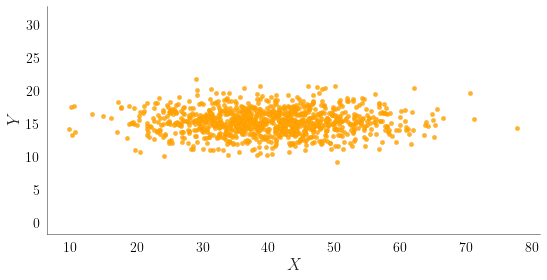

In [122]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(7.7, 4), tight_layout=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.patch.set_facecolor('white')
ax.scatter(X3[:, 0], X3[:, 1], alpha=0.85, color='orange', edgecolors='darkorange', s=20, linewidth=0.2)
ax.axis('equal');
_, _ = ax.set_xlabel('$X$', fontsize=17), ax.set_ylabel('$Y$', fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
dark_grey = '#262626'
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(dark_grey)
ax.xaxis.label.set_color(dark_grey)
ax.yaxis.label.set_color(dark_grey)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

Decorrelating data does not always make sense. We have successfully decorrelated our fish data and now can easily use the length of the fish. However, the weight values have been altered and you need evaluate if this feature is still useful. In this example it is probably not that useful to apply whitening. Whitening is however very useful for images as pixels are very correlated with their neighboring pixels. Still, whitening is a useful tool in your toolbox and as it is closely related to PCA gives also understanding in that topic.

I hope that this shed some light into variance, covariance, the variance-covariance matrix, PCA, and whitening and how they are all linked. When I first learned about these topics it felt very abstract but the geometric representation helped my understanding. Hopefully, it was also useful for you. 

If you have any questions, comments, or requests, feel free to [contact me on LinkedIn](https://linkedin.com/in/dennisbakhuis).